In [14]:
import numpy as np
import pandas as pd
import scipy as sc
import matplotlib
import sklearn
from sklearn import preprocessing as pp

dataset=pd.read_csv('CSVs/WorldCupMatches.csv')
dataset.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

In [16]:
print(dataset.describe())

              Year  Home Team Goals  Away Team Goals     Attendance  \
count   852.000000       852.000000       852.000000     850.000000   
mean   1985.089202         1.811033         1.022300   45164.800000   
std      22.448825         1.610255         1.087573   23485.249247   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   30000.000000   
50%    1990.000000         2.000000         1.000000   41579.500000   
75%    2002.000000         3.000000         2.000000   61374.500000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            852.000000            852.000000  8.520000e+02  8.520000e+02  
mean               0.708920              0.428404  1.066177e+07  6.134687e+07  
std                0.937414              0.691252  2.729613e+07  1.110572e+08  
min                0.000000             

In [17]:
column_names=dataset.columns
print(column_names)
dataset.dtypes
for i in column_names:
    print("{} is unique: {}".format(i,dataset[i].is_unique))

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')
Year is unique: False
Datetime is unique: False
Stage is unique: False
Stadium is unique: False
City is unique: False
Home Team Name is unique: False
Home Team Goals is unique: False
Away Team Goals is unique: False
Away Team Name is unique: False
Win conditions is unique: False
Attendance is unique: False
Half-time Home Goals is unique: False
Half-time Away Goals is unique: False
Referee is unique: False
Assistant 1 is unique: False
Assistant 2 is unique: False
RoundID is unique: False
MatchID is unique: False
Home Team Initials is unique: False
Away Team Initials is unique: False


In [18]:
print(dataset.index.values)
print('stud' in dataset.index.values)

[   0    1    2 ... 4569 4570 4571]
False


c:\users\admin\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


In [19]:
columns_to_drop=[column_names[i] for i in [9]]
dataset.drop(columns_to_drop,inplace=True,axis=1)

In [20]:
dataset.head(10)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA
5,1930.0,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3.0,0.0,Mexico,9249.0,1.0,0.0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201.0,1095.0,CHI,MEX
6,1930.0,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4.0,0.0,Bolivia,18306.0,0.0,0.0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201.0,1092.0,YUG,BOL
7,1930.0,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Paraguay,18306.0,2.0,0.0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201.0,1097.0,USA,PAR
8,1930.0,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1.0,0.0,Peru,57735.0,0.0,0.0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201.0,1099.0,URU,PER
9,1930.0,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1.0,0.0,France,2000.0,0.0,0.0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201.0,1094.0,CHI,FRA


In [21]:
dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567     True
4568     True
4569     True
4570     True
4571     True
Length: 4572, dtype: bool

In [22]:
#Removing duplicate data
dataset = dataset[~dataset.duplicated()]

In [23]:
#Normalizing dataset
mm_scaler = pp.MinMaxScaler()
dataset['attendance_normalised_minmax'] = pd.DataFrame(mm_scaler.fit_transform(dataset[['Attendance']].values.astype(float)))
dataset.head(100)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,attendance_normalised_minmax
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX,0.014222
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL,0.095118
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA,0.128362
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER,0.003195
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA,0.124580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1954.0,27 Jun 1954 - 17:00,Quarter-finals,Charmilles,Geneva,Germany FR,2.0,0.0,Yugoslavia,17000.0,1.0,0.0,ZSOLT Istvan (HUN),FRANKEN Laurent (BEL),BUCHMUELLER Fritz (SUI),212.0,1285.0,FRG,YUG,0.087285
96,1954.0,27 Jun 1954 - 17:00,Quarter-finals,Wankdorf Stadium,Berne,Hungary,4.0,2.0,Brazil,40000.0,2.0,1.0,ELLIS Arthur (ENG),LING William (ENG),WYSSLING Paul (SUI),212.0,1248.0,HUN,BRA,0.221123
97,1954.0,30 Jun 1954 - 18:00,Semi-finals,St. Jakob,Basel,Germany FR,6.0,1.0,Austria,58000.0,1.0,0.0,ORLANDINI Vincenzo (ITA),ELLIS Arthur (ENG),BUCHMUELLER Fritz (SUI),462.0,1233.0,FRG,AUT,0.325866
98,1954.0,30 Jun 1954 - 18:00,Semi-finals,La Pontaise,Lausanne,Hungary,4.0,2.0,Uruguay,45000.0,0.0,0.0,GRIFFITHS Benjamin (WAL),FAULTLESS Charlie (SCO),VINCENTI Raymond (FRA),462.0,1295.0,HUN,URU,0.250218


In [24]:
import matplotlib.pyplot as plt

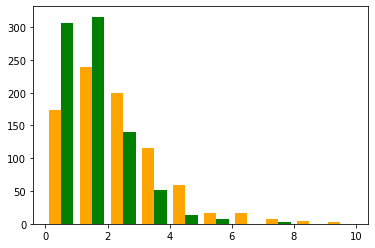

In [27]:
x=dataset['Home Team Goals']
y=dataset['Away Team Goals']
plt.hist([x,y],color=['orange','green'], bins=10)
plt.show()

In [28]:
#Removing null data
dataset=dataset.dropna()

In [29]:
dataset.corr(method='pearson')

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID,attendance_normalised_minmax
Year,1.000000,-0.378924,0.077580,0.304310,-0.280139,0.020335,0.359771,0.620155,0.304310
Home Team Goals,-0.378924,1.000000,0.014605,-0.112661,0.730326,-0.004549,-0.113756,-0.188649,-0.112661
Away Team Goals,0.077580,0.014605,1.000000,-0.029360,-0.003506,0.679136,-0.005214,0.087400,-0.029360
Attendance,0.304310,-0.112661,-0.029360,1.000000,-0.121797,-0.040929,0.074917,0.143524,1.000000
Half-time Home Goals,-0.280139,0.730326,-0.003506,-0.121797,1.000000,0.026466,-0.060103,-0.149213,-0.121797
Half-time Away Goals,0.020335,-0.004549,0.679136,-0.040929,0.026466,1.000000,0.012896,0.061689,-0.040929
RoundID,0.359771,-0.113756,-0.005214,0.074917,-0.060103,0.012896,1.000000,0.092878,0.074917
MatchID,0.620155,-0.188649,0.087400,0.143524,-0.149213,0.061689,0.092878,1.000000,0.143524
attendance_normalised_minmax,0.304310,-0.112661,-0.029360,1.000000,-0.121797,-0.040929,0.074917,0.143524,1.000000


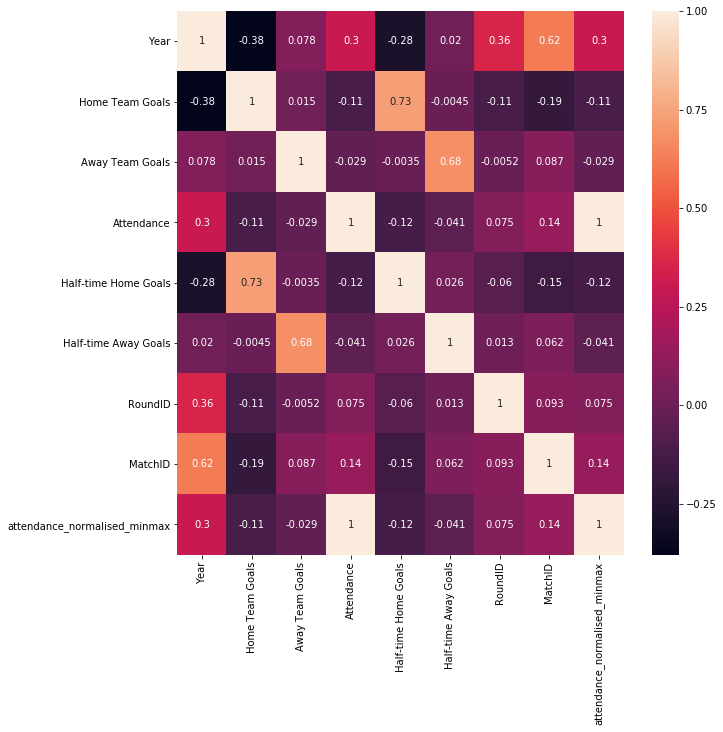

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(dataset.corr(),annot=True)